In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [21]:
df = pd.read_csv('/kaggle/input/vindr-mammo-dataset/updated_metadata.csv')

df.head()

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split,directory_path
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training,Processed_Images/48575a27b7c992427041a82fa750d...
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training,Processed_Images/48575a27b7c992427041a82fa750d...
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training,Processed_Images/75e8e48933289d70b407379a564f8...
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training,Processed_Images/75e8e48933289d70b407379a564f8...
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Architectural Distortion'],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training,Processed_Images/c3487424fee1bdd4515b72dc3fd69...


In [22]:
df = df[['breast_birads', 'directory_path']]

df.head()

,breast_birads,directory_path
0,BI-RADS 4,Processed_Images/48575a27b7c992427041a82fa750d...
1,BI-RADS 4,Processed_Images/48575a27b7c992427041a82fa750d...
2,BI-RADS 3,Processed_Images/75e8e48933289d70b407379a564f8...
3,BI-RADS 3,Processed_Images/75e8e48933289d70b407379a564f8...
4,BI-RADS 4,Processed_Images/c3487424fee1bdd4515b72dc3fd69...


In [23]:
# Path to prepend
base_path = '/kaggle/input/vindr-mammo-dataset/Processed_Images/'

# Prepend the path
df['directory_path'] = base_path + df['directory_path']

# Print the updated DataFrame
df.head()

,breast_birads,directory_path
0,BI-RADS 4,/kaggle/input/vindr-mammo-dataset/Processed_Im...
1,BI-RADS 4,/kaggle/input/vindr-mammo-dataset/Processed_Im...
2,BI-RADS 3,/kaggle/input/vindr-mammo-dataset/Processed_Im...
3,BI-RADS 3,/kaggle/input/vindr-mammo-dataset/Processed_Im...
4,BI-RADS 4,/kaggle/input/vindr-mammo-dataset/Processed_Im...


In [24]:
df.shape

(20486, 2)

In [25]:
df['breast_birads'].unique()

array(['BI-RADS 4', 'BI-RADS 3', 'BI-RADS 5', 'BI-RADS 2', 'BI-RADS 1'],
      dtype=object)

In [26]:
df['breast_birads'].value_counts()

breast_birads
BI-RADS 1    13406
BI-RADS 2     4676
BI-RADS 4     1005
BI-RADS 3      972
BI-RADS 5      427
Name: count, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['breast_birads'] = label_encoder.fit_transform(df['breast_birads'])

df.head()

,breast_birads,directory_path
0,3,/kaggle/input/vindr-mammo-dataset/Processed_Im...
1,3,/kaggle/input/vindr-mammo-dataset/Processed_Im...
2,2,/kaggle/input/vindr-mammo-dataset/Processed_Im...
3,2,/kaggle/input/vindr-mammo-dataset/Processed_Im...
4,3,/kaggle/input/vindr-mammo-dataset/Processed_Im...


In [28]:
df['breast_birads'].value_counts()

breast_birads
0    13406
1     4676
3     1005
2      972
4      427
Name: count, dtype: int64

In [29]:
!pip install imbalanced-learn

import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from transformers import AdamW, SwinForImageClassification, AutoFeatureExtractor
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
from torch.optim.lr_scheduler import CosineAnnealingLR
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [30]:
# Encode labels
label_encoder = LabelEncoder()
df['breast_birads'] = label_encoder.fit_transform(df['breast_birads'])

# Split data into features and labels
X = df[['directory_path']]
y = df['breast_birads']

# Define sampling strategies
oversample = RandomOverSampler(sampling_strategy={2: 4000, 3: 4000, 4: 4000})
undersample = RandomUnderSampler(sampling_strategy={0: 4000, 1: 4000})

# First, oversample minority classes
X_over, y_over = oversample.fit_resample(X, y)

# Then, undersample the majority class
X_balanced, y_balanced = undersample.fit_resample(X_over, y_over)

# Combine into a balanced DataFrame
balanced_df = pd.concat([X_balanced, y_balanced], axis=1)

# Check the distribution
print("Balanced class distribution:", Counter(y_balanced))

Balanced class distribution: Counter({0: 4000, 1: 4000, 2: 4000, 3: 4000, 4: 4000})


In [31]:
# Split the balanced dataset into training and testing sets
train_df, test_df = train_test_split(balanced_df, test_size=0.2, random_state=42, stratify=balanced_df['breast_birads'])

In [32]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [33]:
from transformers import SwinForImageClassification, AutoFeatureExtractor

# Load the model and feature extractor with the correct number of classes
model = SwinForImageClassification.from_pretrained(
    'microsoft/swin-tiny-patch4-window7-224',
    num_labels=5,  # Set this to the number of classes in your dataset
    ignore_mismatched_sizes=True  # Ignore the size mismatch for the classifier layer
)

feature_extractor = AutoFeatureExtractor.from_pretrained('microsoft/swin-tiny-patch4-window7-224')

# Move the model to the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

#import torch_xla.core.xla_model as xm

# Move the model to TPU device if using a TPU
#device = xm.xla_device()
#model.to(device)

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([5]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


SwinForImageClassification(
  (swin): SwinModel(
    (embeddings): SwinEmbeddings(
      (patch_embeddings): SwinPatchEmbeddings(
        (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): SwinEncoder(
      (layers): ModuleList(
        (0): SwinStage(
          (blocks): ModuleList(
            (0-1): 2 x SwinLayer(
              (layernorm_before): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=96, out_features=96, bias=True)
                  (key): Linear(in_features=96, out_features=96, bias=True)
                  (value): Linear(in_features=96, out_features=96, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfOutput(
  

In [34]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [35]:
# Define your dataset class
class MammogramDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['directory_path']
        image = Image.open(img_path).convert('RGB')
        
        # Use the feature extractor from Hugging Face
        inputs = feature_extractor(images=image, return_tensors="pt")
        pixel_values = inputs['pixel_values'].squeeze(0)  # Remove the batch dimension
        
        label = self.dataframe.iloc[idx]['breast_birads']
        
        return pixel_values, label

In [36]:
# Create DataLoaders
train_dataset = MammogramDataset(dataframe=train_df)
test_dataset = MammogramDataset(dataframe=test_df)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

In [37]:
import torch.nn as nn

# Set up the optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=0.0001, weight_decay=0.001)
#scheduler = CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, threshold=1e-4, min_lr=1e-6)
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/10, Batch 1/250, Batch Loss: 1.6275197267532349
Epoch 1/10, Batch 2/250, Batch Loss: 1.6524585485458374
Epoch 1/10, Batch 3/250, Batch Loss: 1.6000300645828247
Epoch 1/10, Batch 4/250, Batch Loss: 1.6409411430358887
Epoch 1/10, Batch 5/250, Batch Loss: 1.655009388923645
Epoch 1/10, Batch 6/250, Batch Loss: 1.6305121183395386
Epoch 1/10, Batch 7/250, Batch Loss: 1.6242523193359375
Epoch 1/10, Batch 8/250, Batch Loss: 1.5959949493408203
Epoch 1/10, Batch 9/250, Batch Loss: 1.6026630401611328
Epoch 1/10, Batch 10/250, Batch Loss: 1.6085072755813599
Epoch 1/10, Batch 11/250, Batch Loss: 1.6099765300750732
Epoch 1/10, Batch 12/250, Batch Loss: 1.594074010848999
Epoch 1/10, Batch 13/250, Batch Loss: 1.5816876888275146
Epoch 1/10, Batch 14/250, Batch Loss: 1.603384017944336
Epoch 1/10, Batch 15/250, Batch Loss: 1.5843778848648071
Epoch 1/10, Batch 16/250, Batch Loss: 1.636922836303711
Epoch 1/10, Batch 17/250, Batch Loss: 1.5971035957336426
Epoch 1/10, Batch 18/250, Batch Loss: 1.6359

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/10, Batch 250/250, Batch Loss: 0.9475719928741455
Epoch 1/10 Completed. Avg Loss: 1.2347432947158814, Accuracy: 0.4405


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation Loss: 0.948852867361099, Validation Accuracy: 0.585


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 2/10, Batch 1/250, Batch Loss: 0.9456197023391724
Epoch 2/10, Batch 2/250, Batch Loss: 1.0218632221221924
Epoch 2/10, Batch 3/250, Batch Loss: 1.0329772233963013
Epoch 2/10, Batch 4/250, Batch Loss: 0.9203621745109558
Epoch 2/10, Batch 5/250, Batch Loss: 0.8788126707077026
Epoch 2/10, Batch 6/250, Batch Loss: 0.941047191619873
Epoch 2/10, Batch 7/250, Batch Loss: 0.9820442199707031
Epoch 2/10, Batch 8/250, Batch Loss: 1.0715349912643433
Epoch 2/10, Batch 9/250, Batch Loss: 0.7811347246170044
Epoch 2/10, Batch 10/250, Batch Loss: 0.7031992077827454
Epoch 2/10, Batch 11/250, Batch Loss: 0.8694697618484497
Epoch 2/10, Batch 12/250, Batch Loss: 0.8211475610733032
Epoch 2/10, Batch 13/250, Batch Loss: 0.9390033483505249
Epoch 2/10, Batch 14/250, Batch Loss: 0.8965010643005371
Epoch 2/10, Batch 15/250, Batch Loss: 1.0149258375167847
Epoch 2/10, Batch 16/250, Batch Loss: 0.864950954914093
Epoch 2/10, Batch 17/250, Batch Loss: 0.9614977240562439
Epoch 2/10, Batch 18/250, Batch Loss: 0.90

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 2/10, Batch 250/250, Batch Loss: 0.6068636775016785
Epoch 2/10 Completed. Avg Loss: 0.8316823139190673, Accuracy: 0.6431875


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation Loss: 0.7231664894119142, Validation Accuracy: 0.67875


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 3/10, Batch 1/250, Batch Loss: 0.516380786895752
Epoch 3/10, Batch 2/250, Batch Loss: 0.5620461106300354
Epoch 3/10, Batch 3/250, Batch Loss: 0.6864448189735413
Epoch 3/10, Batch 4/250, Batch Loss: 0.6054800748825073
Epoch 3/10, Batch 5/250, Batch Loss: 0.633348822593689
Epoch 3/10, Batch 6/250, Batch Loss: 0.8711954355239868
Epoch 3/10, Batch 7/250, Batch Loss: 0.7803764343261719
Epoch 3/10, Batch 8/250, Batch Loss: 0.6408332586288452
Epoch 3/10, Batch 9/250, Batch Loss: 0.6200116276741028
Epoch 3/10, Batch 10/250, Batch Loss: 0.7911345958709717
Epoch 3/10, Batch 11/250, Batch Loss: 0.5335803627967834
Epoch 3/10, Batch 12/250, Batch Loss: 0.5169863104820251
Epoch 3/10, Batch 13/250, Batch Loss: 0.5504482984542847
Epoch 3/10, Batch 14/250, Batch Loss: 0.6762776970863342
Epoch 3/10, Batch 15/250, Batch Loss: 0.6689310669898987
Epoch 3/10, Batch 16/250, Batch Loss: 0.48491379618644714
Epoch 3/10, Batch 17/250, Batch Loss: 0.5643949508666992
Epoch 3/10, Batch 18/250, Batch Loss: 0.6

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 3/10, Batch 250/250, Batch Loss: 0.5716794729232788
Epoch 3/10 Completed. Avg Loss: 0.5646896175146103, Accuracy: 0.759625


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation Loss: 0.5566989670670222, Validation Accuracy: 0.76625


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 4/10, Batch 1/250, Batch Loss: 0.3607345223426819
Epoch 4/10, Batch 2/250, Batch Loss: 0.34864065051078796
Epoch 4/10, Batch 3/250, Batch Loss: 0.3922542333602905
Epoch 4/10, Batch 4/250, Batch Loss: 0.4504416584968567
Epoch 4/10, Batch 5/250, Batch Loss: 0.4702468514442444
Epoch 4/10, Batch 6/250, Batch Loss: 0.506273090839386
Epoch 4/10, Batch 7/250, Batch Loss: 0.4580461382865906
Epoch 4/10, Batch 8/250, Batch Loss: 0.36927273869514465
Epoch 4/10, Batch 9/250, Batch Loss: 0.4631882905960083
Epoch 4/10, Batch 10/250, Batch Loss: 0.5171861052513123
Epoch 4/10, Batch 11/250, Batch Loss: 0.38545605540275574
Epoch 4/10, Batch 12/250, Batch Loss: 0.32579025626182556
Epoch 4/10, Batch 13/250, Batch Loss: 0.45987796783447266
Epoch 4/10, Batch 14/250, Batch Loss: 0.27811017632484436
Epoch 4/10, Batch 15/250, Batch Loss: 0.47340458631515503
Epoch 4/10, Batch 16/250, Batch Loss: 0.5232200622558594
Epoch 4/10, Batch 17/250, Batch Loss: 0.44059035181999207
Epoch 4/10, Batch 18/250, Batch L

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 4/10, Batch 250/250, Batch Loss: 0.308971107006073
Epoch 4/10 Completed. Avg Loss: 0.41620605885982515, Accuracy: 0.821


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation Loss: 0.4714167633699992, Validation Accuracy: 0.7865


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 5/10, Batch 1/250, Batch Loss: 0.27978700399398804
Epoch 5/10, Batch 2/250, Batch Loss: 0.3388063907623291
Epoch 5/10, Batch 3/250, Batch Loss: 0.27927035093307495
Epoch 5/10, Batch 4/250, Batch Loss: 0.31020572781562805
Epoch 5/10, Batch 5/250, Batch Loss: 0.24501590430736542
Epoch 5/10, Batch 6/250, Batch Loss: 0.2526084780693054
Epoch 5/10, Batch 7/250, Batch Loss: 0.3202768862247467
Epoch 5/10, Batch 8/250, Batch Loss: 0.2669502794742584
Epoch 5/10, Batch 9/250, Batch Loss: 0.34825974702835083
Epoch 5/10, Batch 10/250, Batch Loss: 0.3740447163581848
Epoch 5/10, Batch 11/250, Batch Loss: 0.5349199175834656
Epoch 5/10, Batch 12/250, Batch Loss: 0.3144977390766144
Epoch 5/10, Batch 13/250, Batch Loss: 0.4276365637779236
Epoch 5/10, Batch 14/250, Batch Loss: 0.2556114196777344
Epoch 5/10, Batch 15/250, Batch Loss: 0.28607046604156494
Epoch 5/10, Batch 16/250, Batch Loss: 0.24650853872299194
Epoch 5/10, Batch 17/250, Batch Loss: 0.46112191677093506
Epoch 5/10, Batch 18/250, Batch 

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 5/10, Batch 250/250, Batch Loss: 0.4280139207839966
Epoch 5/10 Completed. Avg Loss: 0.3274815086722374, Accuracy: 0.8563125


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation Loss: 0.5208517629948873, Validation Accuracy: 0.789


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 6/10, Batch 1/250, Batch Loss: 0.20766904950141907
Epoch 6/10, Batch 2/250, Batch Loss: 0.23620182275772095
Epoch 6/10, Batch 3/250, Batch Loss: 0.14727403223514557
Epoch 6/10, Batch 4/250, Batch Loss: 0.2923256754875183
Epoch 6/10, Batch 5/250, Batch Loss: 0.23229053616523743
Epoch 6/10, Batch 6/250, Batch Loss: 0.2990363836288452
Epoch 6/10, Batch 7/250, Batch Loss: 0.22410531342029572
Epoch 6/10, Batch 8/250, Batch Loss: 0.2816537916660309
Epoch 6/10, Batch 9/250, Batch Loss: 0.3649415373802185
Epoch 6/10, Batch 10/250, Batch Loss: 0.18129481375217438
Epoch 6/10, Batch 11/250, Batch Loss: 0.27399682998657227
Epoch 6/10, Batch 12/250, Batch Loss: 0.17726163566112518
Epoch 6/10, Batch 13/250, Batch Loss: 0.3958612084388733
Epoch 6/10, Batch 14/250, Batch Loss: 0.2586345076560974
Epoch 6/10, Batch 15/250, Batch Loss: 0.45600807666778564
Epoch 6/10, Batch 16/250, Batch Loss: 0.2525100111961365
Epoch 6/10, Batch 17/250, Batch Loss: 0.2720754146575928
Epoch 6/10, Batch 18/250, Batch

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 6/10, Batch 250/250, Batch Loss: 0.4273320734500885
Epoch 6/10 Completed. Avg Loss: 0.2796563985943794, Accuracy: 0.882375


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation Loss: 0.5308479794434139, Validation Accuracy: 0.798


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 7/10, Batch 1/250, Batch Loss: 0.27355143427848816
Epoch 7/10, Batch 2/250, Batch Loss: 0.3193601369857788
Epoch 7/10, Batch 3/250, Batch Loss: 0.2973119616508484
Epoch 7/10, Batch 4/250, Batch Loss: 0.1957804262638092
Epoch 7/10, Batch 5/250, Batch Loss: 0.26607903838157654
Epoch 7/10, Batch 6/250, Batch Loss: 0.14288322627544403
Epoch 7/10, Batch 7/250, Batch Loss: 0.18395574390888214
Epoch 7/10, Batch 8/250, Batch Loss: 0.24780160188674927
Epoch 7/10, Batch 9/250, Batch Loss: 0.23891571164131165
Epoch 7/10, Batch 10/250, Batch Loss: 0.21875789761543274
Epoch 7/10, Batch 11/250, Batch Loss: 0.3172251582145691
Epoch 7/10, Batch 12/250, Batch Loss: 0.32206282019615173
Epoch 7/10, Batch 13/250, Batch Loss: 0.13312968611717224
Epoch 7/10, Batch 14/250, Batch Loss: 0.1766698658466339
Epoch 7/10, Batch 15/250, Batch Loss: 0.17262002825737
Epoch 7/10, Batch 16/250, Batch Loss: 0.1765315681695938
Epoch 7/10, Batch 17/250, Batch Loss: 0.18301302194595337
Epoch 7/10, Batch 18/250, Batch 

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 7/10, Batch 250/250, Batch Loss: 0.393402099609375
Epoch 7/10 Completed. Avg Loss: 0.2317523946762085, Accuracy: 0.9058125


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation Loss: 0.6116043291394673, Validation Accuracy: 0.7965


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 8/10, Batch 1/250, Batch Loss: 0.10865895450115204
Epoch 8/10, Batch 2/250, Batch Loss: 0.09922146052122116
Epoch 8/10, Batch 3/250, Batch Loss: 0.12619434297084808
Epoch 8/10, Batch 4/250, Batch Loss: 0.2304772138595581
Epoch 8/10, Batch 5/250, Batch Loss: 0.10814628005027771
Epoch 8/10, Batch 6/250, Batch Loss: 0.11250775307416916
Epoch 8/10, Batch 7/250, Batch Loss: 0.2857714593410492
Epoch 8/10, Batch 8/250, Batch Loss: 0.05913839489221573
Epoch 8/10, Batch 9/250, Batch Loss: 0.2213982790708542
Epoch 8/10, Batch 10/250, Batch Loss: 0.11676298826932907
Epoch 8/10, Batch 11/250, Batch Loss: 0.12016557157039642
Epoch 8/10, Batch 12/250, Batch Loss: 0.15812638401985168
Epoch 8/10, Batch 13/250, Batch Loss: 0.07920011132955551
Epoch 8/10, Batch 14/250, Batch Loss: 0.18820033967494965
Epoch 8/10, Batch 15/250, Batch Loss: 0.23111191391944885
Epoch 8/10, Batch 16/250, Batch Loss: 0.16078190505504608
Epoch 8/10, Batch 17/250, Batch Loss: 0.13355883955955505
Epoch 8/10, Batch 18/250, 

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 8/10, Batch 250/250, Batch Loss: 0.18568529188632965
Epoch 8/10 Completed. Avg Loss: 0.1746621268093586, Accuracy: 0.92975


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation Loss: 0.5144867284430398, Validation Accuracy: 0.81025


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 9/10, Batch 1/250, Batch Loss: 0.22742526233196259
Epoch 9/10, Batch 2/250, Batch Loss: 0.07891970872879028
Epoch 9/10, Batch 3/250, Batch Loss: 0.09697941690683365
Epoch 9/10, Batch 4/250, Batch Loss: 0.1486874520778656
Epoch 9/10, Batch 5/250, Batch Loss: 0.2002890706062317
Epoch 9/10, Batch 6/250, Batch Loss: 0.18895919620990753
Epoch 9/10, Batch 7/250, Batch Loss: 0.14572113752365112
Epoch 9/10, Batch 8/250, Batch Loss: 0.20699267089366913
Epoch 9/10, Batch 9/250, Batch Loss: 0.25226321816444397
Epoch 9/10, Batch 10/250, Batch Loss: 0.2878129184246063
Epoch 9/10, Batch 11/250, Batch Loss: 0.13747593760490417
Epoch 9/10, Batch 12/250, Batch Loss: 0.1784382313489914
Epoch 9/10, Batch 13/250, Batch Loss: 0.1029939129948616
Epoch 9/10, Batch 14/250, Batch Loss: 0.12960176169872284
Epoch 9/10, Batch 15/250, Batch Loss: 0.10640323907136917
Epoch 9/10, Batch 16/250, Batch Loss: 0.2392377257347107
Epoch 9/10, Batch 17/250, Batch Loss: 0.22553236782550812
Epoch 9/10, Batch 18/250, Bat

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 9/10, Batch 250/250, Batch Loss: 0.1677687019109726
Epoch 9/10 Completed. Avg Loss: 0.16410858118534088, Accuracy: 0.937375


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation Loss: 0.5687875657800644, Validation Accuracy: 0.7955


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 10/10, Batch 1/250, Batch Loss: 0.07744098454713821
Epoch 10/10, Batch 2/250, Batch Loss: 0.1379227340221405
Epoch 10/10, Batch 3/250, Batch Loss: 0.0801994651556015
Epoch 10/10, Batch 4/250, Batch Loss: 0.10035751760005951
Epoch 10/10, Batch 5/250, Batch Loss: 0.19864962995052338
Epoch 10/10, Batch 6/250, Batch Loss: 0.13827504217624664
Epoch 10/10, Batch 7/250, Batch Loss: 0.13379813730716705
Epoch 10/10, Batch 8/250, Batch Loss: 0.12291722744703293
Epoch 10/10, Batch 9/250, Batch Loss: 0.07651202380657196
Epoch 10/10, Batch 10/250, Batch Loss: 0.17850224673748016
Epoch 10/10, Batch 11/250, Batch Loss: 0.03355127200484276
Epoch 10/10, Batch 12/250, Batch Loss: 0.05899624153971672
Epoch 10/10, Batch 13/250, Batch Loss: 0.07375719398260117
Epoch 10/10, Batch 14/250, Batch Loss: 0.06662314385175705
Epoch 10/10, Batch 15/250, Batch Loss: 0.03788391500711441
Epoch 10/10, Batch 16/250, Batch Loss: 0.1764451414346695
Epoch 10/10, Batch 17/250, Batch Loss: 0.11841344088315964
Epoch 10/

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 10/10, Batch 250/250, Batch Loss: 0.20796528458595276
Epoch 10/10 Completed. Avg Loss: 0.13206576508283616, Accuracy: 0.9515


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation Loss: 0.6433338726323748, Validation Accuracy: 0.80825
Training complete.


/tmp/ipykernel_37/3373066040.py:138: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


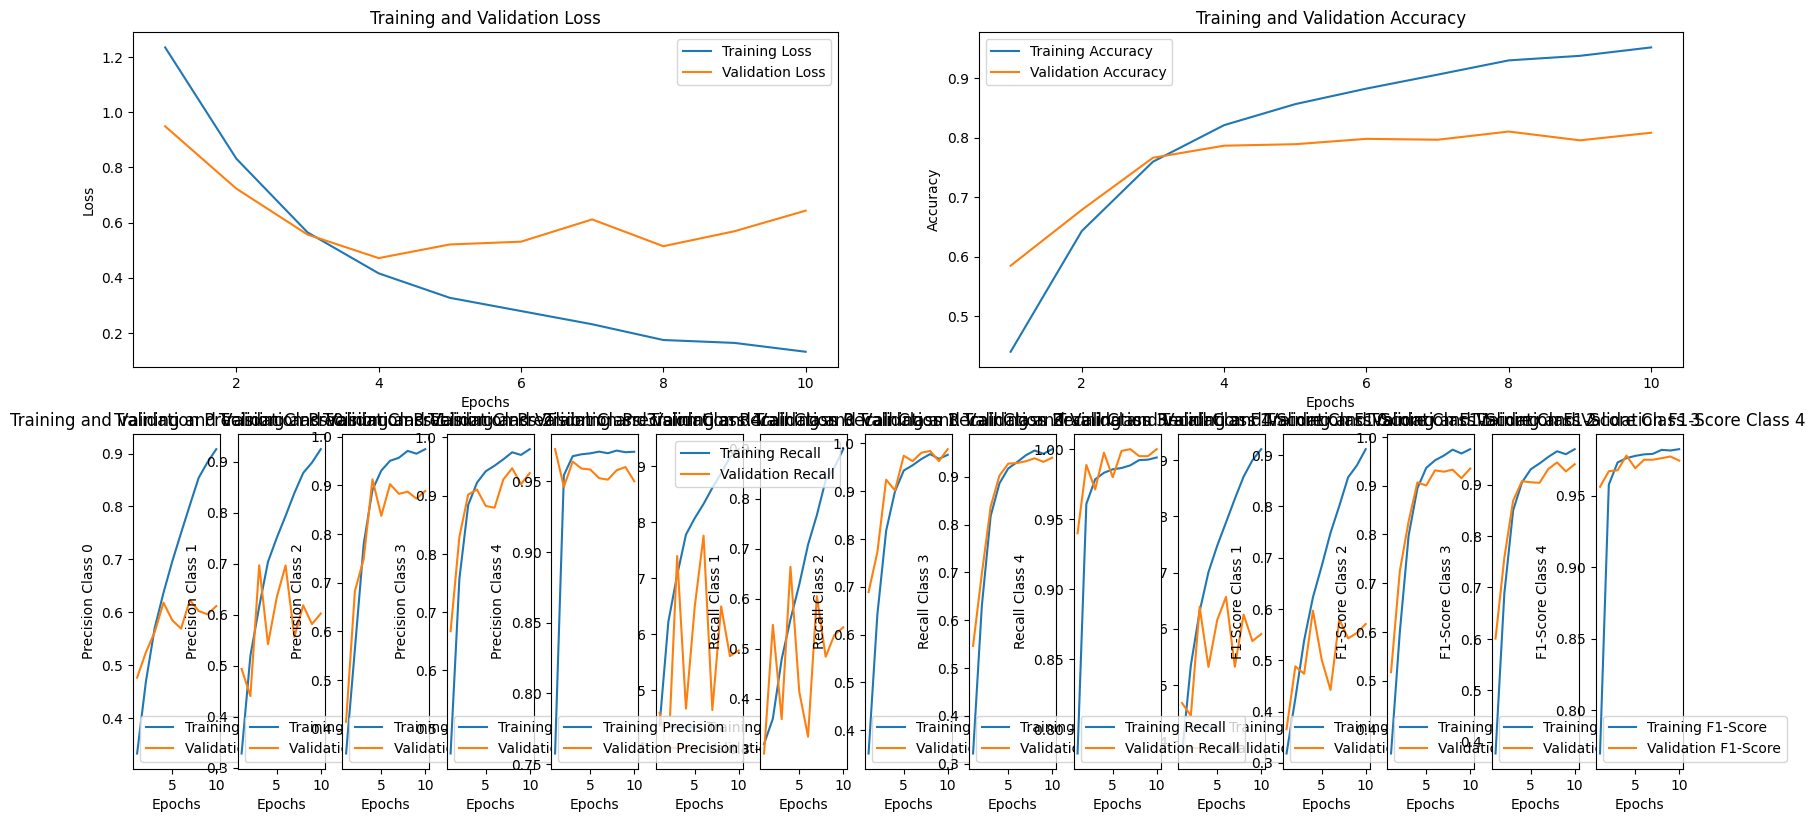

Confusion Matrix:
           FP   TP   FN    TN
Class 0  290  457  343  2910
Class 1  287  434  366  2913
Class 2   99  790   10  3101
Class 3   49  752   48  3151
Class 4   42  800    0  3158


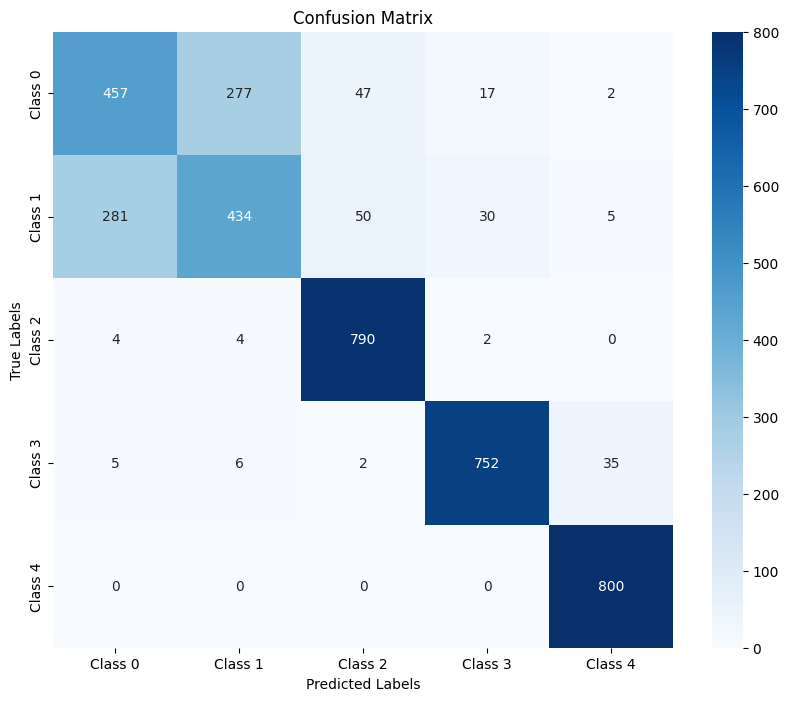

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support

# Initialize lists to store training and validation metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Initialize lists to store precision, recall, and f1-score for each class
train_precisions = []
train_recalls = []
train_f1_scores = []
val_precisions = []
val_recalls = []
val_f1_scores = []

# Training and validation loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    all_labels = []
    all_preds = []

    for batch_idx, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(pixel_values=images).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

        # Print batch loss
        print(f"Epoch {epoch+1}/{num_epochs}, Batch {batch_idx+1}/{len(train_dataloader)}, Batch Loss: {loss.item()}")

    # Calculate training metrics
    train_accuracy = accuracy_score(all_labels, all_preds)
    train_losses.append(running_loss / len(train_dataloader))
    train_accuracies.append(train_accuracy)
    
    train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(all_labels, all_preds, average=None)
    train_precisions.append(train_precision)
    train_recalls.append(train_recall)
    train_f1_scores.append(train_f1)

    print(f"Epoch {epoch+1}/{num_epochs} Completed. Avg Loss: {running_loss/len(train_dataloader)}, Accuracy: {train_accuracy}")
    
    # Validation Phase
    model.eval()
    val_running_loss = 0.0
    all_val_labels = []
    all_val_preds = []
    with torch.no_grad():
        for images, labels in test_dataloader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(pixel_values=images).logits
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            
            _, preds = torch.max(outputs, 1)
            all_val_labels.extend(labels.cpu().numpy())
            all_val_preds.extend(preds.cpu().numpy())

    val_accuracy = accuracy_score(all_val_labels, all_val_preds)
    val_losses.append(val_running_loss / len(test_dataloader))
    val_accuracies.append(val_accuracy)

    val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(all_val_labels, all_val_preds, average=None)
    val_precisions.append(val_precision)
    val_recalls.append(val_recall)
    val_f1_scores.append(val_f1)
    
    print(f"Validation Loss: {val_running_loss/len(test_dataloader)}, Validation Accuracy: {val_accuracy}")
    
    scheduler.step(val_running_loss / len(test_dataloader))

print("Training complete.")


# Plotting Training and Validation Loss
plt.figure(figsize=(20, 20))

plt.subplot(4, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting Training and Validation Accuracy
plt.subplot(4, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

num_classes = len(train_precisions[0])

# Plotting Precision, Recall, and F1-Score for Each Class
for i in range(num_classes):
    plt.subplot(4, num_classes * 3, 3 * num_classes + i + 1)
    plt.plot(range(1, num_epochs + 1), [p[i] for p in train_precisions], label='Training Precision')
    plt.plot(range(1, num_epochs + 1), [p[i] for p in val_precisions], label='Validation Precision')
    plt.xlabel('Epochs')
    plt.ylabel(f'Precision Class {i}')
    plt.title(f'Training and Validation Precision Class {i}')
    plt.legend()

    plt.subplot(4, num_classes * 3, 3 * num_classes + num_classes + i + 1)
    plt.plot(range(1, num_epochs + 1), [r[i] for r in train_recalls], label='Training Recall')
    plt.plot(range(1, num_epochs + 1), [r[i] for r in val_recalls], label='Validation Recall')
    plt.xlabel('Epochs')
    plt.ylabel(f'Recall Class {i}')
    plt.title(f'Training and Validation Recall Class {i}')
    plt.legend()

    plt.subplot(4, num_classes * 3, 3 * num_classes + 2 * num_classes + i + 1)
    plt.plot(range(1, num_epochs + 1), [f[i] for f in train_f1_scores], label='Training F1-Score')
    plt.plot(range(1, num_epochs + 1), [f[i] for f in val_f1_scores], label='Validation F1-Score')
    plt.xlabel('Epochs')
    plt.ylabel(f'F1-Score Class {i}')
    plt.title(f'Training and Validation F1-Score Class {i}')
    plt.legend()

plt.tight_layout()
plt.show()

# Calculate and plot confusion matrix for the last epoch
cm = confusion_matrix(all_val_labels, all_val_preds)

# Compute FP, TP, FN, TN
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Create DataFrame for better visualization
confusion_df = pd.DataFrame({
    'FP': FP,
    'TP': TP,
    'FN': FN,
    'TN': TN
}, index=[f'Class {i}' for i in range(len(FP))])

print("Confusion Matrix:\n", confusion_df)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Class {i}' for i in range(len(cm))],
            yticklabels=[f'Class {i}' for i in range(len(cm))])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [39]:
'''import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

# Initialize lists to store training and validation metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Initialize lists to store precision, recall, and f1-score for each class
train_precisions = []
train_recalls = []
train_f1_scores = []
val_precisions = []
val_recalls = []
val_f1_scores = []

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    all_labels = []
    all_preds = []

    for batch_idx, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

        # Print batch loss
        print(f"Epoch {epoch+1}/{num_epochs}, Batch {batch_idx+1}/{len(train_dataloader)}, Batch Loss: {loss.item()}")

    # Calculate training metrics
    train_accuracy = accuracy_score(all_labels, all_preds)
    train_losses.append(running_loss / len(train_dataloader))
    train_accuracies.append(train_accuracy)
    
    train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(all_labels, all_preds, average=None)
    train_precisions.append(train_precision)
    train_recalls.append(train_recall)
    train_f1_scores.append(train_f1)

    print(f"Epoch {epoch+1}/{num_epochs} Completed. Avg Loss: {running_loss/len(train_dataloader)}, Accuracy: {train_accuracy}")
    
    # Validation Phase
    model.eval()
    val_running_loss = 0.0
    all_val_labels = []
    all_val_preds = []
    with torch.no_grad():
        for images, labels in test_dataloader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            
            _, preds = torch.max(outputs, 1)
            all_val_labels.extend(labels.cpu().numpy())
            all_val_preds.extend(preds.cpu().numpy())

    val_accuracy = accuracy_score(all_val_labels, all_val_preds)
    val_losses.append(val_running_loss / len(test_dataloader))
    val_accuracies.append(val_accuracy)

    val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(all_val_labels, all_val_preds, average=None)
    val_precisions.append(val_precision)
    val_recalls.append(val_recall)
    val_f1_scores.append(val_f1)
    
    print(f"Validation Loss: {val_running_loss/len(test_dataloader)}, Validation Accuracy: {val_accuracy}")
    
    scheduler.step()

print("Training complete.")

# Plotting Training and Validation Loss
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting Training and Validation Accuracy
plt.subplot(2, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.tight_layout()
plt.show()'''

'import matplotlib.pyplot as plt\nfrom sklearn.metrics import precision_recall_fscore_support\n\n# Initialize lists to store training and validation metrics\ntrain_losses = []\nval_losses = []\ntrain_accuracies = []\nval_accuracies = []\n\n# Initialize lists to store precision, recall, and f1-score for each class\ntrain_precisions = []\ntrain_recalls = []\ntrain_f1_scores = []\nval_precisions = []\nval_recalls = []\nval_f1_scores = []\n\nnum_epochs = 10\nfor epoch in range(num_epochs):\n    model.train()\n    running_loss = 0.0\n    all_labels = []\n    all_preds = []\n\n    for batch_idx, (images, labels) in enumerate(train_dataloader):\n        images, labels = images.to(device), labels.to(device)\n\n        optimizer.zero_grad()\n        outputs = model(images)\n        loss = criterion(outputs, labels)\n        loss.backward()\n        optimizer.step()\n\n        running_loss += loss.item()\n\n        _, preds = torch.max(outputs, 1)\n        all_labels.extend(labels.cpu().numpy())

In [40]:
outputs = model(images)
print(outputs.shape)  # This should be [batch_size, num_classes]
loss = criterion(outputs, labels)

AttributeError: 'SwinImageClassifierOutput' object has no attribute 'shape'

In [ ]:
outputs = model(images)
print(f"Outputs shape: {outputs.shape}")  # Should be [batch_size, num_classes]
print(f"Labels shape: {labels.shape}")    # Should be [batch_size]